In [1]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install git+https://github.com/Effective-Quadratures/Effective-Quadratures.git@master # for specific branch

import numpy as np
import matplotlib.pyplot as plt

## Set up test

In [2]:
#our_function = lambda x:  0.3*x**4 -1.6*x**3 +0.6*x**2 +2.4*x - 0.5
our_function = lambda x:  1.8*x

In [3]:
N = 10 # number of training points (note, some will be removed below)
n = 2 # degree of polynomial

x = np.sort((2*np.random.rand(N,1)-1),axis=0)
noise_var = 0.01
y = our_function(x) + np.random.randn(N,1)*np.sqrt(noise_var)
pos = ((x>0)*(x<0.3)).nonzero()[0]
x = np.delete(x,pos)[:,None].squeeze()
y = np.delete(y,pos)[:,None].squeeze()

# outliers!
nout = 1
index = np.random.choice(len(y),nout,replace=False)
print(index)
#y[index] += np.random.uniform(-1,1,nout,random_state=42)*4
y[index] = 3

N = len(x)

dimensions = 1
if N < n: quit('N must exceed n')
    
x = x.reshape(-1,1)
xtest = np.linspace(-1,1,100).reshape(-1,1)
ytest = our_function(xtest)

[4]


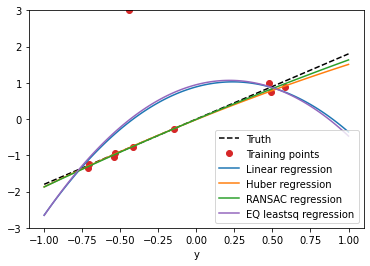

In [4]:
plt.plot(xtest,ytest,'k--',label='Truth')
plt.plot(x,y,'oC3',label='Training points')

from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(n), LinearRegression())
model.fit(x,y)
ypred = model.predict(xtest)
plt.plot(xtest,ypred,'C0-',label='Linear regression')

model = make_pipeline(PolynomialFeatures(n), HuberRegressor())
model.fit(x,y)
ypred = model.predict(xtest)
plt.plot(xtest,ypred,'C1-',label='Huber regression')

model = make_pipeline(PolynomialFeatures(n), RANSACRegressor())
model.fit(x,y)
ypred = model.predict(xtest)
plt.plot(xtest,ypred,'C2-',label='RANSAC regression')

from equadratures import *
param = Parameter(distribution='uniform', lower=-1, upper=1, order=2)
basis = Basis('univariate')
poly = Poly(parameters=param, basis=basis, method='least-squares', \
              sampling_args= {'mesh': 'user-defined', 'sample-points':x.reshape(-1,1), 'sample-outputs': y.reshape(-1,1)})
poly.set_model()
ypred = poly.get_polyfit(xtest.reshape(-1,1))
plt.plot(xtest,ypred,'C4-',label='EQ leastsq regression')

plt.ylim([-3,3])
plt.xlabel('x')
plt.xlabel('y')
plt.legend()
plt.show()